<a href="https://colab.research.google.com/github/veriaci/Quantitative-Finance/blob/master/ProbStok_K6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediksi Harga Saham - Menggunanakan Geometric Brownian Motion**

Kelompok 6:
*   Muhammad Fadil: 1706042812
*   Mustofa Kamal: 1706043020
*   Hanif Imam: 1706043273

**Pre-Requisite and Importing**

In [2]:
import pandas as pd
import numpy as np
import scipy
import statistics 
import matplotlib.pyplot as plt

import chart_studio
#chart_studio.tools.set_credentials_file(username='mkcotm', api_key='cGq8WwVZcZMe9Nxt4gS0')

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly import figure_factory as FF
from google.colab import files
Data = files.upload()

Saving AMD.csv to AMD.csv
Saving NVDA.csv to NVDA.csv
Saving TSLA.csv to TSLA.csv


In [0]:
import io
S_NV = pd.read_csv(io.BytesIO(Data['NVDA.csv']))
S_AM = pd.read_csv(io.BytesIO(Data['AMD.csv']))
S_TS = pd.read_csv(io.BytesIO(Data['TSLA.csv']))

**Plotting Actual Stock Data**

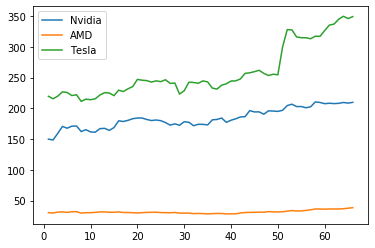

In [43]:
adj_close_NV = S_NV['Adj Close']
adj_close_AM = S_AM['Adj Close']
adj_close_TS = S_TS['Adj Close']

time_NV = np.linspace(1, len(adj_close_NV), len(adj_close_NV))
time_AM = np.linspace(1, len(adj_close_AM), len(adj_close_AM))
time_TS = np.linspace(1, len(adj_close_TS), len(adj_close_TS))

plt.plot(time_NV, adj_close_NV, label = 'Nvidia')
plt.plot(time_AM, adj_close_AM, label = 'AMD')
plt.plot(time_TS, adj_close_TS, label = 'Tesla')
plt.legend(loc = 'upper left')

**Finding Drift Coefficient(mu) and Diffusion Coefficient(sigma)**

In [44]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

# Nvidia
returns_NV = daily_return(adj_close_NV)

mu_NV = np.mean(returns_NV)*132.           # drift coefficient
sig_NV = np.std(returns_NV)*np.sqrt(132.)  # diffusion coefficient

print("Nvidia mu  =", mu_NV, ", Nvidia sigma  =", sig_NV)

# AMD
returns_AM = daily_return(adj_close_AM)

mu_AM = np.mean(returns_AM)*132.           # drift coefficient
sig_AM = np.std(returns_AM)*np.sqrt(132.)  # diffusion coefficient

print("AMD mu     =", mu_AM,", AMD sigma    =", sig_AM)

# Tesla


returns_TS = daily_return(adj_close_TS)

mu_TS = np.mean(returns_TS)*132.           # drift coefficient
sig_TS = np.std(returns_TS)*np.sqrt(132.)  # diffusion coefficient

print("Tesla mu   =", mu_TS,", Tesla Sigma    =", sig_TS)

Nvidia mu  = 0.7205418738346935 , Nvidia sigma  = 0.2721864729018265
AMD mu     = 0.5124201691732482 , AMD sigma    = 0.24049341112314057
Tesla mu   = 1.0118318956891408 , Tesla Sigma    = 0.37174691364227497


**Defining Brownian Motion**

In [0]:
seed = 5       
N  = 2.**6     # increments

def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                         # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian  increments
    W = np.cumsum(b)                                  # brownian path
    return W, b


# brownian increments
b = Brownian(seed, N)[1]

# brownian motion
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)                      # W_0 = 0. for brownian motion

**Implementing Geometric Brownian Motion to the stocks using the Drift and Diffusion Coefficient**

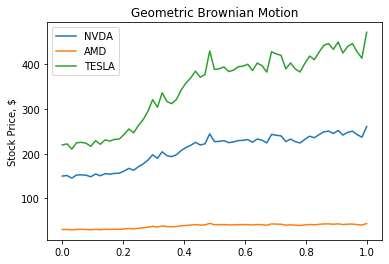

In [46]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t


seed = 22
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

# Nvidia
So_NV = adj_close_NV[0]  
soln_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]     # Exact solution
t_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[1]        # time increments for  plotting

# AMD
So_AM = adj_close_AM[0]    
soln_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]    # Exact solution
t_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[1]       # time increments for  plotting

# Tesla
So_TS = adj_close_TS[0]  
soln_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]    # Exact solution
t_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[1]       # time increments for  plotting

plt.plot(t_NV, soln_NV, label = 'NVDA')
plt.plot(t_AM, soln_AM, label = 'AMD')
plt.plot(t_TS, soln_TS, label = 'TESLA')
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')
plt.legend(loc = 'upper left')

**Finding the best Random Number Generator Seed to be implemented to each of the Stock Simulation**

In [48]:
# Testing Best Seeds
import statistics as st

actual=[0]*4
value_NV=[100000]*101
value_AM=[100000]*101
value_TS=[100000]*101
actual[1] = st.mean(adj_close_NV)
actual[2] = st.mean(adj_close_AM)
actual[3] = st.mean(adj_close_TS)

for i in range(1,100):
  seed = i
  W = Brownian(seed, N)[0]

  soln_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]
  soln_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]
  soln_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]

  value_NV[i] = abs(st.mean(soln_NV) - actual[1])
  value_AM[i] = abs(st.mean(soln_AM) - actual[2])
  value_TS[i] = abs(st.mean(soln_TS) - actual[3])

bestNV=np.where(value_NV==min(value_NV))
bestNV=int(bestNV[0])
bestAM=np.where(value_AM==min(value_AM))
bestAM=int(bestAM[0])
bestTS=np.where(value_TS==min(value_TS))
bestTS=int(bestTS[0])

print("Best Seed for Nvidia Stock =", bestNV)
print("Best Seed for AMD Stock    =",bestAM)
print("Best Seed for Tesla Stock  =",bestTS)

#Solution with best seed
seed = bestNV
W = Brownian(seed, N)[0]
soln_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]
seed = bestAM;
W = Brownian(seed, N)[0]
soln_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]
seed = bestTS;
W = Brownian(seed, N)[0]
soln_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]

Best Seed for Nvidia Stock = 96
Best Seed for AMD Stock    = 62
Best Seed for Tesla Stock  = 62


**Comparing the Seed with Actual Stock Data**

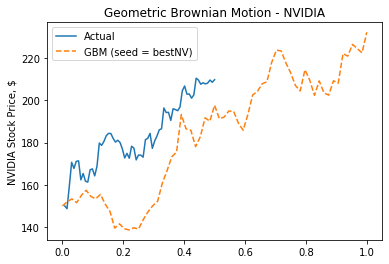

In [49]:
# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close_NV), len(adj_close_NV))
time = [i/132. for i in time]

plt.plot(time, adj_close_NV, label = 'Actual')
plt.plot(t_NV, soln_NV, label = 'GBM (seed = bestNV)', ls='--')

plt.ylabel('NVIDIA Stock Price, $')
plt.title('Geometric Brownian Motion - NVIDIA')

plt.legend(loc = 'upper left')

**Comparing the BestSeed from the previous function with other seeds**

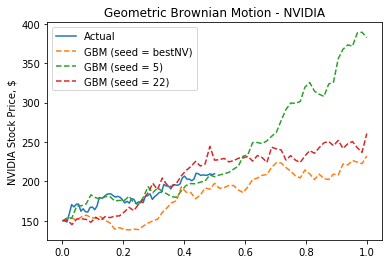

In [50]:
T = 1.
N = 2.**6
So_NV = adj_close_NV[0]

seed = 5
W = Brownian(seed, N)[0]
solna = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]    

seed = 22
W = Brownian(seed, N)[0]
solnb = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close_NV), len(adj_close_NV))
time = [i/132. for i in time]

plt.plot(time, adj_close_NV, label = 'Actual')
plt.plot(t_NV, soln_NV, label = 'GBM (seed = bestNV)', ls = '--')
plt.plot(t_NV, solna, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t_NV, solnb, label = 'GBM (seed = 22)', ls = '--')

plt.ylabel('NVIDIA Stock Price, $')
plt.title('Geometric Brownian Motion - NVIDIA')

plt.legend(loc = 'upper left')

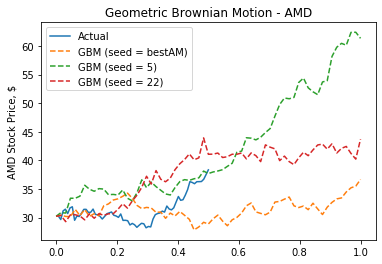

In [51]:
T = 1.
N = 2.**6
So_AM = adj_close_AM[0]

seed = 5
W = Brownian(seed, N)[0]
solna = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]    

seed = 22
W = Brownian(seed, N)[0]
solnb = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close_AM), len(adj_close_AM))
time = [i/132. for i in time]

plt.plot(time, adj_close_AM, label = 'Actual')
plt.plot(t_NV, soln_AM, label = 'GBM (seed = bestAM)', ls = '--')
plt.plot(t_NV, solna, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t_NV, solnb, label = 'GBM (seed = 22)', ls = '--')

plt.ylabel('AMD Stock Price, $')
plt.title('Geometric Brownian Motion - AMD')

plt.legend(loc = 'upper left')

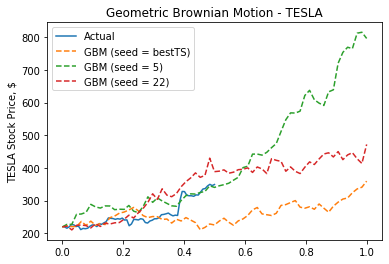

In [52]:
T = 1.
N = 2.**6
So_TS = adj_close_TS[0]

seed = 5
W = Brownian(seed, N)[0]
solna = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]    

seed = 22
W = Brownian(seed, N)[0]
solnb = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close_TS), len(adj_close_TS))
time = [i/132. for i in time]

plt.plot(time, adj_close_TS, label = 'Actual')
plt.plot(t_NV, soln_TS, label = 'GBM (seed = bestTS)', ls = '--')
plt.plot(t_NV, solna, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t_NV, solnb, label = 'GBM (seed = 22)', ls = '--')

plt.ylabel('TESLA Stock Price, $')
plt.title('Geometric Brownian Motion - TESLA')

plt.legend(loc = 'upper left')

**Using the Euler Maruyama Method and Comparing it to the Geometric Brownian Motion**

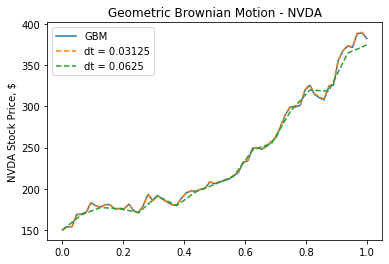

In [53]:
# Exact solution - GBM Model
seed = 5
So_NV = adj_close_NV[0]            # Initial NVDIA stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[0]    # Exact solution
t_NV = GBM(So_NV, mu_NV, sig_NV, W, T, N)[1]       # time increments for  plotting
plt.plot(t_NV, soln_NV, label ='GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in range(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So_NV, mu_NV, sig_NV, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(So_NV, mu_NV, sig_NV, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)

plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('NVDA Stock Price, $')
plt.title('Geometric Brownian Motion - NVDA')

plt.legend(loc = 'upper left')



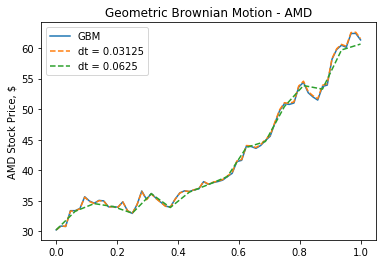

In [54]:
# Exact solution - GBM Model
seed = 5
So_AM = adj_close_AM[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[0]    # Exact solution
t_AM = GBM(So_AM, mu_AM, sig_AM, W, T, N)[1]       # time increments for  plotting
plt.plot(t_AM, soln_AM, label ='GBM')


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1b = EM(So_AM, mu_AM, sig_AM, b, T, N, M)[0]
time_EM_1b = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2b = EM(So_AM, mu_AM, sig_AM, b, T, N, M)[0]
time_EM_2b = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1b, EM_approx_1b, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2b, EM_approx_2b, label = 'dt = 0.0625', ls ='--')


plt.ylabel('AMD Stock Price, $')
plt.title('Geometric Brownian Motion - AMD')

plt.legend(loc = 'upper left')


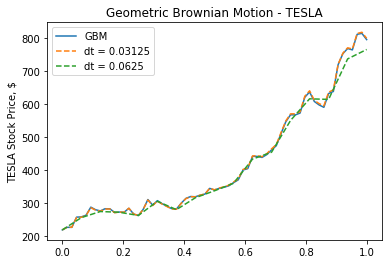

In [55]:
# Exact solution - GBM Model
seed = 5
So_TS = adj_close_TS[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[0]    # Exact solution
t_TS = GBM(So_TS, mu_TS, sig_TS, W, T, N)[1]       # time increments for  plotting
plt.plot(t_TS, soln_TS, label ='GBM')


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1c = EM(So_TS, mu_TS, sig_TS, b, T, N, M)[0]
time_EM_1c = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2c = EM(So_TS, mu_TS, sig_TS, b, T, N, M)[0]
time_EM_2c = np.linspace(0.,1.,L+1)


plt.plot(time_EM_1c, EM_approx_1c, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2c, EM_approx_2c, label = 'dt = 0.0625', ls ='--')


plt.ylabel('TESLA Stock Price, $')
plt.title('Geometric Brownian Motion - TESLA')

plt.legend(loc = 'upper left')


**Base Code From https://jtsulliv.github.io/stock-movement/**